In [53]:
#libarary
import pandas as pd
#from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline 

In [45]:
#1. import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [9]:
numerics = [ 'int64',  'float64']
train_numeric = train.select_dtypes(include=numerics)
#train_numeric = train.select_dtypes(exclude=['object'])
test_numeric = test.select_dtypes(include=numerics)

In [10]:
train_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
test_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [13]:
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

# Training

## 1. Ordinary Linear Regression

In [15]:
#initialization
#knn = KNeighborsRegressor(n_neighbors=5)
reg = linear_model.LinearRegression(normalize=False)
#reg = LinearRegression()

In [16]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# prepare independent and target, then split it into train and validation
X = train_numeric.drop(['SalePrice'],axis=1)
y = train_numeric['SalePrice']

In [119]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [121]:
y[:5]

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [23]:
X = X.fillna(0)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# learning
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
X_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [35]:
reg.coef_

array([ -2.64613914e+00,  -1.86787528e+02,  -2.50219767e+01,
         4.27793629e-01,   1.81222695e+04,   3.43131753e+03,
         2.98025389e+02,   1.72208107e+02,   2.28983600e+01,
         6.76608534e+00,  -2.33395599e+00,  -1.69796787e+00,
         2.73416149e+00,   4.36353101e+00,   2.48374533e+00,
         2.39061792e+01,   3.07534556e+01,   1.17295665e+04,
        -1.42779111e+02,   5.38048088e+03,   1.72240059e+01,
        -9.91240978e+03,  -1.42252757e+04,   7.02404082e+03,
         4.94422856e+03,  -1.33428318e+01,   1.70968068e+04,
         7.41808534e+00,   2.83839443e+01,  -1.48438492e+01,
         1.64063233e+01,   4.89568601e+01,   9.16307120e+01,
        -1.54739895e+02,  -1.19764636e+00,  -3.59095308e+01,
        -1.36064601e+02])

In [51]:
train.groupby(['OverallQual']).agg({'SalePrice':['mean']})

,SalePrice
,mean
OverallQual,
1,50150.000000
2,51770.333333
3,87473.750000
4,108420.655172
5,133523.347607
6,161603.034759
7,207716.423197
8,274735.535714


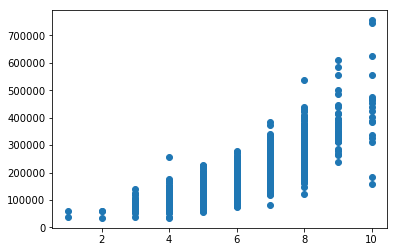

In [55]:
plt.scatter(train.OverallQual, train.SalePrice)


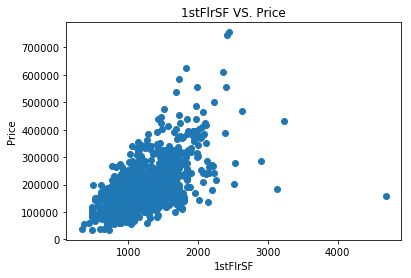

In [62]:
plt.scatter(train['1stFlrSF'], train.SalePrice)
plt.xlabel('1stFlrSF')
plt.ylabel('Price')
plt.title("1stFlrSF VS. Price")

In [65]:
train[(train['1stFlrSF'] > 4000) & (train['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [36]:
reg.intercept_

-687299.54371673393

In [37]:
# validation prediction MSE
y_test_pred = reg.predict(X_test)
mean_squared_error(y_test, y_test_pred)

1538566819.4192553

In [16]:
# train prediction MSE
y_train_pred = reg.predict(X_train)
mean_squared_error(y_train, y_train_pred)

1079459509.7923293

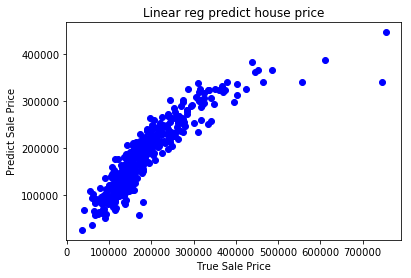

In [40]:
#plot
plt.scatter(y_test, y_test_pred, color='blue', linewidth=1)
plt.xlabel("True Sale Price")
plt.ylabel("Predict Sale Price")
plt.title("Linear reg predict house price")
plt.show()

# Linear Regression with Normalization

In [67]:
#initialization
#knn = KNeighborsRegressor(n_neighbors=5)
reg_norm = linear_model.LinearRegression(normalize=True)
#reg = LinearRegression()

In [68]:
reg_norm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [70]:
reg_norm.coef_

array([ -2.63267527e+00,  -1.87901408e+02,  -2.19186987e+01,
         4.41261131e-01,   1.81897245e+04,   3.44409939e+03,
         2.94304819e+02,   1.73293575e+02,   2.28202507e+01,
         3.89427858e+14,   3.89427858e+14,   3.89427858e+14,
        -3.89427858e+14,   6.47604554e+13,   6.47604554e+13,
         6.47604554e+13,  -6.47604554e+13,   1.16801609e+04,
        -2.69580603e+00,   5.44264582e+03,   1.19695663e+02,
        -9.91368224e+03,  -1.41828504e+04,   6.99252448e+03,
         4.78674590e+03,  -1.33129814e+01,   1.71244333e+04,
         7.81671207e+00,   2.91024222e+01,  -1.38645049e+01,
         1.62759255e+01,   5.00820198e+01,   9.11226427e+01,
        -1.54848204e+02,  -1.03191150e+00,  -5.22738790e+01,
        -1.43762265e+02])

In [72]:
X_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

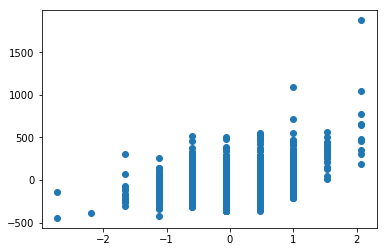

In [80]:
plt.scatter((X_train['OverallQual'] - X_train['OverallQual'].mean())/ X_train['OverallQual'].var() 
            , (X_train['1stFlrSF'] - X_train['1stFlrSF'].mean()) / X_train['OverallQual'].var())

In [77]:
X_train['OverallQual'].std()

1.3704749931099303

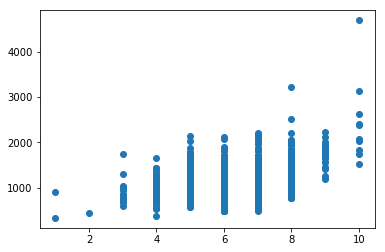

In [81]:
plt.scatter(X_train['OverallQual'] 
            , X_train['1stFlrSF'] )

# Ridge

In [158]:
reg_ridge = linear_model.Ridge(alpha=0.01)

In [159]:
reg_ridge

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [160]:
reg_ridge.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [161]:
len(reg_ridge.coef_)

37

In [162]:
max(reg_ridge.coef_)

18122.356704668498

In [163]:
min(reg_ridge.coef_)

-14219.741738785764

In [178]:
reg_ridge.coef_

array([ -2.64602681e+00,  -1.86795357e+02,  -2.50238218e+01,
         4.27800889e-01,   1.81223567e+04,   3.43125858e+03,
         2.98040692e+02,   1.72227223e+02,   2.28983831e+01,
         6.76641335e+00,  -2.33370934e+00,  -1.69839827e+00,
         2.73458337e+00,   4.36282557e+00,   2.48399869e+00,
         2.39071798e+01,   3.07544296e+01,   1.17284490e+04,
        -1.43158268e+02,   5.37955225e+03,   1.70897485e+01,
        -9.91205597e+03,  -1.42197417e+04,   7.02357455e+03,
         4.94441646e+03,  -1.33420325e+01,   1.70950467e+04,
         7.42179571e+00,   2.83848885e+01,  -1.48432015e+01,
         1.64077850e+01,   4.89575215e+01,   9.16321274e+01,
        -1.54741561e+02,  -1.19805348e+00,  -3.59253835e+01,
        -1.36094197e+02])

In [167]:
import numpy as np
np.mean(list(reg_ridge.coef_))

1179.7176744474843

In [ ]:
ridge_loss = mse + weight_loss

In [175]:
weight_loss = 1170**2*37/37

In [176]:
s_mse = 1079459509*1000

In [177]:
mse/weight_loss

788.5597996875807

# Lasso

In [146]:
reg_lasso = linear_model.Lasso(alpha=0.1)

In [147]:
reg_lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [149]:
len(reg_lasso.coef_)

37

# Submission

In [41]:
test_numeric = test_numeric.fillna(0) #fill na to 0
test_numeric_pred = reg.predict(test_numeric) # use knn to predict test_numeric
#test_numeric['SalePrice'] = test_numeric_pred
#result = test_numeric[['Id','SalePrice']]
#result.to_csv('submission_knn_version_0.csv',index=False)

In [42]:
test_numeric['SalePrice'] = test_numeric_pred
result = test_numeric[['Id','SalePrice']]
result.to_csv('submission_linear_version_0429.csv',index=False)

In [43]:
result.head()

,Id,SalePrice
0,1461,121705.669601
1,1462,136354.285994
2,1463,169170.371111
3,1464,198277.975994
4,1465,196467.689306


In [ ]:
Implement next permutation, which rearranges numbers into the lexicographically next greater permutation of numbers.

If such arrangement is not possible, it must rearrange it as the lowest possible order (ie, sorted in ascending order).

The replacement must be in-place and use only constant extra memory.

Here are some examples. Inputs are in the left-hand column and its corresponding outputs are in the right-hand column.

1,2,3 → 1,3,2
3,2,1 → 1,2,3
1,1,5 → 1,5,1
2,1,3

In [82]:
class Solution(object):
    def nextPermutation(self, nums):
        """
        :type nums: List[int]
        :rtype: void Do not return anything, modify nums in-place instead.
        """
        

In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def reverseKGroup(self, head, k):
        """
        :type head: ListNode
        :type k: int
        :rtype: ListNode
        """
        dummy = pre = ListNode(0)
        dummy.next = head
        cnt = 0
        tail = head
        while True:
            while head and tail and cnt < k:
                tail = tail.next
            if tail is None:
                return
            reverse(pre, head, tail)

In [84]:
[[0]*2]*3

[[0, 0], [0, 0], [0, 0]]

In [186]:
s = '''

create multiset volatile  table TMP_iiii as
(
SEL
SLR_ID, user_cre_date, min_auct_start_date
FROM my_database.my_tablename_dormant_driver
WHERE SLR_ID MOD 100 = iiii

)WITH DATA PRIMARY INDEX (slr_id)on commit preserve rows;


create multiset volatile  table first_listing_acct_tmx_iiii as
(
select
b.slr_id
,b.user_cre_date
,b.min_auct_start_date,
--,b.model_seg
a.SRC_CRE_DT as src_cre_dt_tmx, a.SRC_CRE_TM as src_cre_tm_tmx,
CAST(  SRC_CRE_DT AS TIMESTAMP(0)) +
            (SRC_CRE_TM - TIME '00:00:00' HOUR TO SECOND) as tmx_ts,

cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a14') as date format 'YYYY-MM-DD') as device_first_seen,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a136') as varchar(50)) as true_ip_assert_history,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a2') as date format 'YYYY-MM-DD') as account_login_first_seen,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a3') as date format 'YYYY-MM-DD') as account_login_last_event,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a4') as date format 'YYYY-MM-DD') as account_login_last_update,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a5') as varchar(50)) as account_login_result,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a6') as integer ) as account_login_score,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a7') as integer ) as account_login_worst_score,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a21') as integer ) as device_score,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a135') as varchar(50)) as tmx_summary_reason_code,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a20') as varchar(50)) as device_result,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a22') as integer ) as device_worst_score,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a28') as varchar(50)) as flash_anomaly,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a29') as date format 'YYYY-MM-DD') as fuzzy_device_first_seen,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a137') as integer ) as custom_policy_score,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a140') as integer ) as tmx_policy_score,
cast ( sojlib.soj_nvl(a.ATTR_4_TXT , 'a34') as varchar(50)) as fuzzy_device_match_result,
cast ( sojlib.soj_nvl(a.ATTR_4_TXT , 'a36') as integer ) as fuzzy_device_score,
cast ( sojlib.soj_nvl(a.ATTR_4_TXT , 'a37') as integer ) as fuzzy_device_worst_score,
cast ( sojlib.soj_nvl(a.ATTR_4_TXT , 'a40') as varchar(50)) as http_os_signature,
cast ( sojlib.soj_nvl(a.ATTR_5_TXT , 'a54') as integer ) as policy_score,
cast ( sojlib.soj_nvl(a.ATTR_5_TXT , 'a80') as varchar(50)) as risk_rating,
cast ( sojlib.soj_nvl(a.ATTR_5_TXT , 'a126') as varchar(50)) as page_time_on,
cast ( sojlib.soj_nvl(a.ATTR_6_TXT , 'a90') as date format 'YYYY-MM-DD') as true_ip_first_seen,
cast ( sojlib.soj_nvl(a.ATTR_6_TXT , 'a93') as date format 'YYYY-MM-DD') as true_ip_last_event,
cast ( sojlib.soj_nvl(a.ATTR_6_TXT , 'a100') as integer ) as true_ip_score,
cast ( sojlib.soj_nvl(a.ATTR_6_TXT , 'a84') as integer ) as summary_risk_score,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a15') as varchar(50)) as device_id,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a88') as varchar(50)) as true_ip,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a92') as varchar(50)) as true_ip_isp,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a89') as varchar(50)) as true_ip_city,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a98') as varchar(50)) as true_ip_region,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a91') as varchar(50)) as true_ip_geo,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a117') as varchar(50)) as agent_os,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a86') as varchar(50)) as time_zone,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a8') as varchar(50)) as browser_language,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a56') as varchar(50)) as proxy_ip,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a63') as varchar(50)) as proxy_ip_isp,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a60') as varchar(50)) as proxy_ip_city,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a62') as varchar(50)) as proxy_ip_geo,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a116') as varchar(50)) as agent_type,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a9') as varchar(50)) as browser_string,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a27') as varchar(50)) as event_type,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a30') as varchar(50)) as fuzzy_device_id,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a153') as varchar(50)) as ua_platform,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a154') as varchar(50)) as ua_os,
cast ( sojlib.soj_nvl(a.ATTR_4_TXT , 'a41') as varchar(50)) as http_referer,
cast ( sojlib.soj_nvl(a.ATTR_6_TXT , 'a97') as varchar(50)) as true_ip_organization


from tmp_iiii b
join TNS_access_views.TNS_EBAY_VENDOR_RSPNS_DATA a

on b.slr_id = a.user_id
where a.SRC_CRE_DT <= cast(b.min_auct_start_date as date) and slr_id mod 100 = iiii 
--where  model_seg = 'C2C_APAC_NEW' --src_cre_dt_tmx <= min_auct_start_dt and
--QUALIFY ROW_NUMBER() OVER(PARTITION BY b.slr_id ORDER BY SRC_CRE_DT_tmx asc) = 1

)WITH DATA PRIMARY INDEX (slr_id, SRC_CRE_dt_tmx,src_cre_tm_tmx)on commit preserve rows;


drop table tmp_iiii;
'''

In [187]:
print(s)




create multiset volatile  table TMP_iiii as
(
SEL
SLR_ID, user_cre_date, min_auct_start_date
FROM my_database.my_tablename_dormant_driver
WHERE SLR_ID MOD 100 = iiii

)WITH DATA PRIMARY INDEX (slr_id)on commit preserve rows;


create multiset volatile  table first_listing_acct_tmx_iiii as
(
select
b.slr_id
,b.user_cre_date
,b.min_auct_start_date,
--,b.model_seg
a.SRC_CRE_DT as src_cre_dt_tmx, a.SRC_CRE_TM as src_cre_tm_tmx,
CAST(  SRC_CRE_DT AS TIMESTAMP(0)) +
            (SRC_CRE_TM - TIME '00:00:00' HOUR TO SECOND) as tmx_ts,

cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a14') as date format 'YYYY-MM-DD') as device_first_seen,
cast ( sojlib.soj_nvl(a.ATTR_1_TXT , 'a136') as varchar(50)) as true_ip_assert_history,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a2') as date format 'YYYY-MM-DD') as account_login_first_seen,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a3') as date format 'YYYY-MM-DD') as account_login_last_event,
cast ( sojlib.soj_nvl(a.ATTR_3_TXT , 'a4') as date format 'YYYY-MM-DD') as acc

In [188]:
sql = ""
for i in range(100):
    sql = sql + "\n" + s.replace("iiii", str(i))
#print(sql)

In [190]:
sql2 = '''

create multiset  volatile table first_listing_acct_tmx as
(
select * from first_listing_acct_tmx_0
union all

select * from first_listing_acct_tmx_1
union all

select * from first_listing_acct_tmx_2
union all

select * from first_listing_acct_tmx_3
union all

select * from first_listing_acct_tmx_4
union all

select * from first_listing_acct_tmx_5
union all

select * from first_listing_acct_tmx_6
union all

select * from first_listing_acct_tmx_7
union all

select * from first_listing_acct_tmx_8
union all

select * from first_listing_acct_tmx_9
union all

select * from first_listing_acct_tmx_10
union all

select * from first_listing_acct_tmx_11
union all

select * from first_listing_acct_tmx_12
union all

select * from first_listing_acct_tmx_13
union all

select * from first_listing_acct_tmx_14
union all

select * from first_listing_acct_tmx_15
union all

select * from first_listing_acct_tmx_16
union all

select * from first_listing_acct_tmx_17
union all

select * from first_listing_acct_tmx_18
union all

select * from first_listing_acct_tmx_19
union all

select * from first_listing_acct_tmx_20
union all

select * from first_listing_acct_tmx_21
union all

select * from first_listing_acct_tmx_22
union all

select * from first_listing_acct_tmx_23
union all

select * from first_listing_acct_tmx_24
union all

select * from first_listing_acct_tmx_25
union all

select * from first_listing_acct_tmx_26
union all

select * from first_listing_acct_tmx_27
union all

select * from first_listing_acct_tmx_28
union all

select * from first_listing_acct_tmx_29
union all

select * from first_listing_acct_tmx_30
union all

select * from first_listing_acct_tmx_31
union all

select * from first_listing_acct_tmx_32
union all

select * from first_listing_acct_tmx_33
union all

select * from first_listing_acct_tmx_34
union all

select * from first_listing_acct_tmx_35
union all

select * from first_listing_acct_tmx_36
union all

select * from first_listing_acct_tmx_37
union all

select * from first_listing_acct_tmx_38
union all

select * from first_listing_acct_tmx_39
union all

select * from first_listing_acct_tmx_40
union all

select * from first_listing_acct_tmx_41
union all

select * from first_listing_acct_tmx_42
union all

select * from first_listing_acct_tmx_43
union all

select * from first_listing_acct_tmx_44
union all

select * from first_listing_acct_tmx_45
union all

select * from first_listing_acct_tmx_46
union all

select * from first_listing_acct_tmx_47
union all

select * from first_listing_acct_tmx_48
union all

select * from first_listing_acct_tmx_49
union all

select * from first_listing_acct_tmx_50
union all

select * from first_listing_acct_tmx_51
union all

select * from first_listing_acct_tmx_52
union all

select * from first_listing_acct_tmx_53
union all

select * from first_listing_acct_tmx_54
union all

select * from first_listing_acct_tmx_55
union all

select * from first_listing_acct_tmx_56
union all

select * from first_listing_acct_tmx_57
union all

select * from first_listing_acct_tmx_58
union all

select * from first_listing_acct_tmx_59
union all

select * from first_listing_acct_tmx_60
union all

select * from first_listing_acct_tmx_61
union all

select * from first_listing_acct_tmx_62
union all

select * from first_listing_acct_tmx_63
union all

select * from first_listing_acct_tmx_64
union all

select * from first_listing_acct_tmx_65
union all

select * from first_listing_acct_tmx_66
union all

select * from first_listing_acct_tmx_67
union all

select * from first_listing_acct_tmx_68
union all

select * from first_listing_acct_tmx_69
union all

select * from first_listing_acct_tmx_70
union all

select * from first_listing_acct_tmx_71
union all

select * from first_listing_acct_tmx_72
union all

select * from first_listing_acct_tmx_73
union all

select * from first_listing_acct_tmx_74
union all

select * from first_listing_acct_tmx_75
union all

select * from first_listing_acct_tmx_76
union all

select * from first_listing_acct_tmx_77
union all

select * from first_listing_acct_tmx_78
union all

select * from first_listing_acct_tmx_79
union all

select * from first_listing_acct_tmx_80
union all

select * from first_listing_acct_tmx_81
union all

select * from first_listing_acct_tmx_82
union all

select * from first_listing_acct_tmx_83
union all

select * from first_listing_acct_tmx_84
union all

select * from first_listing_acct_tmx_85
union all

select * from first_listing_acct_tmx_86
union all

select * from first_listing_acct_tmx_87
union all

select * from first_listing_acct_tmx_88
union all

select * from first_listing_acct_tmx_89
union all

select * from first_listing_acct_tmx_90
union all

select * from first_listing_acct_tmx_91
union all

select * from first_listing_acct_tmx_92
union all

select * from first_listing_acct_tmx_93
union all

select * from first_listing_acct_tmx_94
union all

select * from first_listing_acct_tmx_95
union all

select * from first_listing_acct_tmx_96
union all

select * from first_listing_acct_tmx_97
union all

select * from first_listing_acct_tmx_98
union all

select * from first_listing_acct_tmx_99

)WITH DATA PRIMARY INDEX (slr_id, SRC_CRE_dt_tmx,src_cre_tm_tmx)on commit preserve rows;





--drop table my_database.first_listing_acct_tmx1;
--drop table first_listing_acct_tmx1;
create multiset  volatile table first_listing_acct_tmx1 as
(

sel 
slr_id as slr_id_tmx

,tmx_ts
,true_ip
,device_id
,cast(min_auct_start_date as date) - device_first_seen as days_device_1st_seen
,case when true_ip_assert_history = 'NEGATIVE_HISTORY' then 1 else 0 end as trueIP_neg_flag
,cast(min_auct_start_date as date) - account_login_first_seen as days_accountlogin_1st_seen
,cast(min_auct_start_date as date) - account_login_last_event as days_accountlgin_last_event
,cast(min_auct_start_date as date) - account_login_last_update as days_accountlgin_last_update
,case when account_login_result = 'success' then 1 else 0 end as login_succ_flag
,account_login_score
,account_login_worst_score
,device_score
,case when tmx_summary_reason_code is null then 0 else 1 end as tmx_smy_code_flag

,case when device_result = 'success' then 1 else 0 end as device_success_flag
,device_worst_score
,case when flash_anomaly = 'yes' then 1 else 0 end as flash_anomaly_flag
,cast(min_auct_start_date as date) - fuzzy_device_first_seen as days_fuzzydevice_1st_seen
, custom_policy_score
,tmx_policy_score
,case when fuzzy_device_match_result = 'success' then 1 else 0 end as fuzzy_device_match_flag
,case when fuzzy_device_match_result = 'new_device' then 1 else 0 end as new_fuzzy_device_match_flag
,fuzzy_device_score
,fuzzy_device_worst_score
,case when http_os_signature like any ('%Mac%', '%IOS%') then 1 else 0 end  as http_os_mac_ios_flag
,case when http_os_signature like any ('%Windows%') then 1 else 0 end  as http_os_windows_flag
,case when http_os_signature like any ('%Linux%') then 1 else 0 end  as http_os_linux_flag
,policy_score
,case
    when risk_rating = 'high' then 1 
    when risk_rating = 'medium' then 2 
    when risk_rating = 'low' then 3 
    when risk_rating = 'neural' then 4
    when risk_rating = 'trusted' then 5 
    else -1 end as risk_rating_num
,page_time_on
,cast(min_auct_start_date as date) - true_ip_first_seen as days_trueip_1st_seen
,cast(min_auct_start_date as date) - true_ip_last_event as days_trueip_last_event
,true_ip_score
,summary_risk_score
from first_listing_acct_tmx
where cast(tmx_ts as date) <= cast(min_auct_start_date as date )
qualify row_number() over (partition by slr_id order by SRC_CRE_dt_tmx desc,src_cre_tm_tmx desc ) = 1
)WITH DATA PRIMARY INDEX (slr_id_tmx) on commit preserve rows;




create multiset volatile table first_listing_acct_tmx2 as
(
sel 
slr_id as slr_id_tmx1
,count(*) as cnt_tmx_hit
,count(distinct device_id) as cnt_distinct_device
,count(distinct true_ip) as cnt_distinct_true_ip
,count(distinct true_ip_isp) as cnt_distinct_true_ip_isp
,count(distinct true_ip_city) as cnt_distinct_true_ip_city
,count(distinct true_ip_region) as cnt_distinct_true_ip_region
,count(distinct true_ip_geo) as cnt_distinct_true_ip_geo
,count(distinct agent_os) as cnt_distinct_agent_os
,count(distinct time_zone) as cnt_distinct_timezone
,count(distinct browser_language) as cnt_distinct_browser_language
,count(distinct proxy_ip) as cnt_distinct_proxy_ip
,count(distinct proxy_ip_geo) as cnt_distinct_proxy_ip_geo
,count(distinct proxy_ip_city) as cnt_distinct_proxy_ip_city
--,count(distinct proxy_ip_geo) as cnt_distinct_proxy_ip_geo
,count(distinct agent_type) as cnt_distinct_agent_type
,count(distinct browser_string) as cnt_distinct_browser_string
--,count(event_type) as cnt_event_type
,count(distinct event_type) as cnt_distinct_event_type
,count(distinct fuzzy_device_id) as cnt_distinct_fuzzy_device_id
,count(distinct ua_platform) as cnt_distinct_ua_platform
,count(distinct ua_os) as cnt_distinct_ua_os
,count(distinct http_os_signature) as cnt_distinct_http_os_signature
,count(distinct http_referer) as cnt_distinct_http_referer
,count(true_ip_organization) as cnt_distinct_true_ip_org



from first_listing_acct_tmx
where cast(tmx_ts as date) <= cast(min_auct_start_date as date )
group by 1
)WITH DATA PRIMARY INDEX (slr_id_tmx1)on commit preserve rows;

--drop table my_database.first_listing_acct_tmx3;
create multiset volatile table first_listing_acct_tmx3 as
(
sel 
a.slr_id_tmx as slr_id_tmx2
,a.true_ip
,count(distinct slr_id) as cnt_slr_id_with_true_ip

from first_listing_acct_tmx1 a 
left join first_listing_acct_tmx  b on a.true_ip = b.true_ip and a.tmx_ts >=b.tmx_ts
--where cast(a.tmx_ts as date) <= cast(min_auct_start_date as date )
group by 1,2
--order by cnt_slr_id_with_true_ip desc
)WITH DATA PRIMARY INDEX (slr_id_tmx2)on commit preserve rows;

--sel * from my_database.first_listing_acct_tmx1 where true_ip = '170.170.59.133' order by tmx_ts



sel top 10 * from first_listing_acct_tmx1;

create multiset  volatile table first_listing_acct_tmx4 as
(
sel 
a.slr_id_tmx as slr_id_tmx3
,count(distinct b.slr_id) as cnt_slr_id_with_device

from first_listing_acct_tmx1 a 
left join first_listing_acct_tmx  b on a.device_id = b.device_id and a.tmx_ts >=b.tmx_ts
--where cast(a.tmx_ts as date) <= cast(min_auct_start_date as date )
group by 1
--order by cnt_slr_id_with_device desc 
)WITH DATA PRIMARY INDEX (slr_id_tmx3) on commit preserve rows;



select 1 from dbc.TablesV where databasename='my_database' and TableName='first_listing_acct_tmxinfo';
.if activitycount=0 then GOTo ok
drop table my_database.first_listing_acct_tmxinfo;
.label ok

create multiset  table my_database.first_listing_acct_tmxinfo as
(
SELECT
b.slr_id as slr_id_tmx4
,a.*
,c.*
,d.cnt_slr_id_with_true_ip
,e.cnt_slr_id_with_device
from my_database.my_tablename_dormant_driver b
left join first_listing_acct_tmx1 a on a.slr_id_tmx = b.slr_id
left join first_listing_acct_tmx2 c on c.slr_id_tmx1 = b.slr_id
left join first_listing_acct_tmx3 d on d.slr_id_tmx2 = b.slr_id
left join first_listing_acct_tmx4 e on e.slr_id_tmx3 = b.slr_id
)WITH DATA PRIMARY INDEX (slr_id_tmx4);

'''

In [194]:
text_file = open("/Users/jitxu/Documents/ebay/dormant_fraud/code/Output.txt", "w")

text_file.write(sql + sql2)

text_file.close()

In [102]:
ss = '''
select * from all_session_iiii
union all 
'''
print(ss)


select * from all_session_iiii
union all 



In [103]:
sql1 = ''
for i in range(100):
    sql1 = sql1 + ss.replace('iiii',str(i))
print(sql1)


select * from all_session_0
union all 

select * from all_session_1
union all 

select * from all_session_2
union all 

select * from all_session_3
union all 

select * from all_session_4
union all 

select * from all_session_5
union all 

select * from all_session_6
union all 

select * from all_session_7
union all 

select * from all_session_8
union all 

select * from all_session_9
union all 

select * from all_session_10
union all 

select * from all_session_11
union all 

select * from all_session_12
union all 

select * from all_session_13
union all 

select * from all_session_14
union all 

select * from all_session_15
union all 

select * from all_session_16
union all 

select * from all_session_17
union all 

select * from all_session_18
union all 

select * from all_session_19
union all 

select * from all_session_20
union all 

select * from all_session_21
union all 

select * from all_session_22
union all 

select * from all_session_23
union all 

select * from all_session

In [116]:
s = ['a', 's', 'ddd']

In [117]:
[x.upper() for x in s if len(x) >=2]

['DDD']

# CL

In [195]:
sql_cs2 = '''
create multiset volatile table all_session as (


select * from all_session_0
union all 

select * from all_session_1
union all 

select * from all_session_2
union all 

select * from all_session_3
union all 

select * from all_session_4
union all 

select * from all_session_5
union all 

select * from all_session_6
union all 

select * from all_session_7
union all 

select * from all_session_8
union all 

select * from all_session_9
union all 

select * from all_session_10
union all 

select * from all_session_11
union all 

select * from all_session_12
union all 

select * from all_session_13
union all 

select * from all_session_14
union all 

select * from all_session_15
union all 

select * from all_session_16
union all 

select * from all_session_17
union all 

select * from all_session_18
union all 

select * from all_session_19
union all 

select * from all_session_20
union all 

select * from all_session_21
union all 

select * from all_session_22
union all 

select * from all_session_23
union all 

select * from all_session_24
union all 

select * from all_session_25
union all 

select * from all_session_26
union all 

select * from all_session_27
union all 

select * from all_session_28
union all 

select * from all_session_29
union all 

select * from all_session_30
union all 

select * from all_session_31
union all 

select * from all_session_32
union all 

select * from all_session_33
union all 

select * from all_session_34
union all 

select * from all_session_35
union all 

select * from all_session_36
union all 

select * from all_session_37
union all 

select * from all_session_38
union all 

select * from all_session_39
union all 

select * from all_session_40
union all 

select * from all_session_41
union all 

select * from all_session_42
union all 

select * from all_session_43
union all 

select * from all_session_44
union all 

select * from all_session_45
union all 

select * from all_session_46
union all 

select * from all_session_47
union all 

select * from all_session_48
union all 

select * from all_session_49
union all 

select * from all_session_50
union all 

select * from all_session_51
union all 

select * from all_session_52
union all 

select * from all_session_53
union all 

select * from all_session_54
union all 

select * from all_session_55
union all 

select * from all_session_56
union all 

select * from all_session_57
union all 

select * from all_session_58
union all 

select * from all_session_59
union all 

select * from all_session_60
union all 

select * from all_session_61
union all 

select * from all_session_62
union all 

select * from all_session_63
union all 

select * from all_session_64
union all 

select * from all_session_65
union all 

select * from all_session_66
union all 

select * from all_session_67
union all 

select * from all_session_68
union all 

select * from all_session_69
union all 

select * from all_session_70
union all 

select * from all_session_71
union all 

select * from all_session_72
union all 

select * from all_session_73
union all 

select * from all_session_74
union all 

select * from all_session_75
union all 

select * from all_session_76
union all 

select * from all_session_77
union all 

select * from all_session_78
union all 

select * from all_session_79
union all 

select * from all_session_80
union all 

select * from all_session_81
union all 

select * from all_session_82
union all 

select * from all_session_83
union all 

select * from all_session_84
union all 

select * from all_session_85
union all 

select * from all_session_86
union all 

select * from all_session_87
union all 

select * from all_session_88
union all 

select * from all_session_89
union all 

select * from all_session_90
union all 

select * from all_session_91
union all 

select * from all_session_92
union all 

select * from all_session_93
union all 

select * from all_session_94
union all 

select * from all_session_95
union all 

select * from all_session_96
union all 

select * from all_session_97
union all 

select * from all_session_98
union all 

select * from all_session_99

)with data primary index(slr_id) ON COMMIT PRESERVE ROWS;

 
COLLECT STATS all_session INDEX (slr_id,start_timestamp);
--reg session
--drop table reg_session ;
create multiset VOLATILE table reg_session as
(sel a.*
,case when user_cre_date>=start_timestamp and user_cre_date <= end_timestamp then 1 else 0 end as flag_reg
from all_session a
where flag_reg = 1
qualify row_number() over(partition by slr_id order by duration_sec desc) = 1
) with data primary index(slr_id) ON COMMIT PRESERVE ROWS;
--sel count(*) from reg_session;
--drop table missing_reg ;
create multiset VOLATILE table missing_reg as
(
    select * from all_session
    where slr_id not in (select slr_id from reg_session)
    qualify row_number() over(partition by slr_id order by start_timestamp) = 1
) with data primary index(slr_id) ON COMMIT PRESERVE ROWS ;
--sel count(*) from missing_reg ;
--sel top 5 slr_id,START_TIMESTAMP ,first_listing_date ,user_cre_date, end_TIMESTAMP ,DURATION_sec from missing_reg ;
--drop table reg_session_all;
create multiset VOLATILE  table reg_session_all as
(sel * from reg_session
union 
sel a.*,0 as flag_reg from missing_reg a 
)with data primary index(slr_id) ON COMMIT PRESERVE ROWS ;
--drop table p_riskmodeling_t.reg_session_all;
select 1 from dbc.TablesV where databasename='p_riskmodeling_t' and TableName='reg_session_all';
.if activitycount=0 then GOTo ok
drop table p_riskmodeling_t.reg_session_all ;
.label ok

create multiset TABLE p_riskmodeling_t.reg_session_all as
(sel
slr_id
,flag_reg
,BID_CORE_CNT               as reg_BID_CORE_CNT       
,BIN_CORE_CNT               as reg_BIN_CORE_CNT       
,DURATION_SEC               as reg_DURATION_SEC       
,END_PAGE_ID                as reg_END_PAGE_ID        
,END_TIMESTAMP              as reg_END_TIMESTAMP      
,EVENT_CNT                  as reg_EVENT_CNT          
,FIRST_APP_ID               as reg_FIRST_APP_ID       
,FIRST_USER_ID              as reg_FIRST_USER_ID      
,GR_1_CNT                   as reg_GR_1_CNT           
,GR_CNT                     as reg_GR_CNT             
,GUID                       as reg_GUID               
,HOMEPAGE_CNT               as reg_HOMEPAGE_CNT       
,IP                         as reg_IP                 
,MYEBAY_CNT                 as reg_MYEBAY_CNT         
,SESSION_REFERRER           as reg_SESSION_REFERRER   
,SESSION_START_DT           as reg_SESSION_START_DT   
,SIGNIN_PAGE_CNT            as reg_SIGNIN_PAGE_CNT    
,START_PAGE_ID              as reg_START_PAGE_ID      
,START_TIMESTAMP            as reg_START_TIMESTAMP    
,TRAFFIC_SRC_ID             as reg_TRAFFIC_SRC_ID     
,VI_CORE_CNT                as reg_VI_CORE_CNT        
,lst_s_SESSION_SKEY         as reg_SESSION_SKEY       
,lst_s_SESSION_SKEY_INT     as reg_SESSION_SKEY_INT   
,strtok(ip,'.',1) ||'.'||strtok(ip,'.',2) as reg_ip2
,strtok(ip,'.',1) ||'.'||strtok(ip,'.',2)||'.'||strtok(ip,'.',3) as reg_ip3
from 
reg_session_all a 
) with data primary index(slr_id) ;
--lst session and after lst session
create multiset VOLATILE TABLE oth_session as
(sel
a.slr_id
,case when first_listing_date>= start_timestamp and first_listing_date <= end_timestamp then 1 
      when start_timestamp> first_listing_date then 2 
      else 0 end as flag_lst
,strtok(ip,'.',1) ||'.'||strtok(ip,'.',2) as lst_ip2
,strtok(ip,'.',1) ||'.'||strtok(ip,'.',2)||'.'||strtok(ip,'.',3) as lst_ip3    
,BID_CORE_CNT               as  lst_BID_CORE_CNT      
,BIN_CORE_CNT               as  lst_BIN_CORE_CNT      
,DURATION_SEC               as  lst_DURATION_SEC      
,END_PAGE_ID                as  lst_END_PAGE_ID       
,END_TIMESTAMP              as  lst_END_TIMESTAMP     
,EVENT_CNT                  as  lst_EVENT_CNT         
,FIRST_APP_ID               as  lst_FIRST_APP_ID      
,FIRST_USER_ID              as  lst_FIRST_USER_ID     
,GR_1_CNT                   as  lst_GR_1_CNT          
,GR_CNT                     as  lst_GR_CNT            
,GUID                       as  lst_GUID              
,HOMEPAGE_CNT               as  lst_HOMEPAGE_CNT      
,IP                         as  lst_IP                
,MYEBAY_CNT                 as  lst_MYEBAY_CNT        
,SESSION_REFERRER           as  lst_SESSION_REFERRER  
,SESSION_START_DT           as  lst_SESSION_START_DT  
,SIGNIN_PAGE_CNT            as  lst_SIGNIN_PAGE_CNT   
,START_PAGE_ID              as  lst_START_PAGE_ID     
,START_TIMESTAMP            as  lst_START_TIMESTAMP   
,TRAFFIC_SRC_ID             as  lst_TRAFFIC_SRC_ID    
,VI_CORE_CNT                as  lst_VI_CORE_CNT       
,lst_s_SESSION_SKEY         as  lst_SESSION_SKEY      
,lst_s_SESSION_SKEY_INT     as  lst_SESSION_SKEY_INT  
from 
all_session a
) with data primary index(slr_id) ON COMMIT PRESERVE ROWS ;
--lst session
create multiset volatile table lst_session as
(sel
* from  oth_session
where flag_lst = 1
qualify row_number() over(partition by slr_id order by lst_duration_sec desc) = 1
) with data primary index(slr_id) ON COMMIT PRESERVE ROWS ;
--after listing session
create multiset volatile table after_session as
(   select 
 slr_id
 ,count(*) as cnt_session_after 
 ,sum(lst_BID_CORE_CNT     ) as BID_CORE_CNT_after    
 ,sum(lst_BIN_CORE_CNT     ) as BIN_CORE_CNT_after    
 ,sum(lst_DURATION_SEC     ) as DURATION_SEC_after    
 ,sum(lst_EVENT_CNT        ) as EVENT_CNT_after       
 ,sum(lst_GR_1_CNT         ) as GR_1_CNT_after        
 ,sum(lst_GR_CNT           ) as GR_CNT_after          
 ,sum(lst_HOMEPAGE_CNT     ) as HOMEPAGE_CNT_after    
 ,sum(lst_MYEBAY_CNT       ) as MYEBAY_CNT_after      
 ,sum(lst_SIGNIN_PAGE_CNT  ) as SIGNIN_PAGE_CNT_after 
 ,sum(lst_VI_CORE_CNT      ) as VI_CORE_CNT_after    
from oth_session
where flag_lst = 2
group by slr_id
) with data primary index(slr_id) on commit preserve rows;
--all session
--drop table all_session_prep;
create multiset VOLATILE TABLE  all_session_prep as
(sel 
a.*
,strtok(ip,'.',1) ||'.'||strtok(ip,'.',2) as ip2
,strtok(ip,'.',1) ||'.'||strtok(ip,'.',2)||'.'||strtok(ip,'.',3) as ip3  
,case when index(lower(SESSION_REFERRER),'google'   )>0   then 1 else 0 end as flag_google     
,case when index(lower(SESSION_REFERRER),'bing'     )>0   then 1 else 0 end as flag_bing       
,case when index(lower(SESSION_REFERRER),'outlook'  )>0   then 1 else 0 end as flag_outlook    
,case when index(lower(SESSION_REFERRER),'facebook' )>0   then 1 else 0 end as flag_fb         
,case when index(lower(SESSION_REFERRER),'yahoo'    )>0   then 1 else 0 end as flag_yahoo      
,case when index(lower(SESSION_REFERRER),'ebay'     )>0   then 1 else 0 end as flag_ebay       
,case when index(lower(SESSION_REFERRER),'m.ebay'   )>0   then 1 else 0 end as flag_mebay      
,case when index(lower(SESSION_REFERRER),'globalcbt')>0   then 1 else 0 end as flag_globalCBT  
,case when index(lower(SESSION_REFERRER),'help'     )>0   then 1 else 0 end as flag_HELP       
,case when index(lower(SESSION_REFERRER),'buyvrfn'  )>0   then 1 else 0 end as flag_buyvrfn    
,case when index(lower(SESSION_REFERRER),'sellvrfn' )>0   then 1 else 0 end as flag_sellvrfn   
,case when session_referrer is null then 1 else 0 end as flag_missing_sr
,case when TRAFFIC_SRC_ID  = 1 then 1 else 0 end as traffic_src_g1
,case when TRAFFIC_SRC_ID  = 2 then 1 else 0 end as traffic_src_g2
,case when TRAFFIC_SRC_ID  in (4,5) then 1 else 0 end as traffic_src_g3
,case when TRAFFIC_SRC_ID  = 8 then 1 else 0 end as traffic_src_g4
,case when TRAFFIC_SRC_ID  in (6,7,10,11,12,13,14,15,16,17,18,19) then 1 else 0 end as traffic_src_g5
,case when TRAFFIC_SRC_ID  in (21,22,23,24) then 1 else 0 end as traffic_src_g6
,case when TRAFFIC_SRC_ID  in (25,26,27,28,29,30,31) then 1 else 0 end as traffic_src_g7
,case when  (flag_google =1 or flag_bing = 1 or flag_yahoo = 1 or flag_fb=1 or flag_outlook = 1) then 1 else 0 end as flag_search
,case when (flag_google =1 or flag_bing = 1 or flag_yahoo = 1 or flag_fb=1 or flag_outlook = 1 or flag_help = 1) then 1 else 0 end as flag_search_help
,case when first_user_id > 0  and first_user_id ^= slr_id then 1 else 0 end as flag_user_id
from all_session a
) with data primary index(slr_id) on commit preserve rows;
--drop table all_session_sum
create multiset volatile table all_session_sum as
(select
 slr_id
,first_listing_dt
,first_listing_date
,COUNT(*) as tot_session_cnt
,count(distinct lst_s_SESSION_SKEY) as uni_session_cnt
,count(guid) as tot_guid_cnt
,count(distinct guid) as uni_guid_cnt    
,max(DURATION_SEC) as max_duration_sec
,min(DURATION_SEC) as min_duration_sec
,avg(duration_sec) as avg_duration_sec
,sum(cast(DURATION_SEC as decimal(18,4)))/sum(event_cnt) as avg_event_time
,min(SESSION_START_DT) as first_session_dt
,max(session_start_dt) as last_session_dt
,sum(BID_CORE_CNT     ) as tot_BID_CORE_CNT    
,sum(BIN_CORE_CNT     ) as tot_BIN_CORE_CNT    
,sum(DURATION_SEC     ) as tot_DURATION_SEC  
,sum(EVENT_CNT        ) as tot_EVENT_CNT
,sum(GR_1_CNT         ) as tot_GR_1_CNT        
,sum(GR_CNT           ) as tot_GR_CNT
,sum(HOMEPAGE_CNT     ) as tot_HOMEPAGE_CNT    
,count(IP               ) as tot_IP_cnt
,count(distinct ip) as uni_ip4_cnt
,count(distinct ip2) as uni_ip2_cnt  
,count(distinct ip3) as uni_ip3_cnt  
,count(distinct first_user_id) as uni_fst_user_id
,count(distinct FIRST_APP_ID) as uni_fst_app_id
,sum(MYEBAY_CNT       ) as tot_MYEBAY_CNT 
,sum(SIGNIN_PAGE_CNT  ) as tot_SIGNIN_PAGE_CNT
,sum(VI_CORE_CNT      ) as tot_VI_CORE_CNT     
,sum(flag_google      ) as cnt_google    
,sum(flag_bing        ) as cnt_bing      
,sum(flag_outlook     ) as cnt_outlook   
,sum(flag_fb          ) as cnt_fb        
,sum(flag_yahoo       ) as cnt_yahoo     
,sum(flag_ebay        ) as cnt_ebay      
,sum(flag_mebay       ) as cnt_mebay     
,sum(flag_globalCBT   ) as cnt_globalCBT 
,sum(flag_HELP        ) as cnt_HELP      
,sum(flag_buyvrfn     ) as cnt_buyvrfn   
,sum(flag_sellvrfn    ) as cnt_sellvrfn  
,sum(flag_missing_sr  ) as cnt_missing_sr  
,sum(traffic_src_g1   ) as cnt_src_g1 
,sum(traffic_src_g2   ) as cnt_src_g2 
,sum(traffic_src_g3   ) as cnt_src_g3 
,sum(traffic_src_g4   ) as cnt_src_g4 
,sum(traffic_src_g5   ) as cnt_src_g5 
,sum(traffic_src_g6   ) as cnt_src_g6 
,sum(traffic_src_g7   ) as cnt_src_g7 
,sum(flag_search      ) as cnt_search
,sum(flag_search_help ) as cnt_search_help
,sum(case when flag_missing_sr = 0 and  flag_ebay = 0 then 1 else 0 end )  as cnt_non_ebay
,max(flag_google      ) as fl_google    
,max(flag_bing        ) as fl_bing      
,max(flag_outlook     ) as fl_outlook   
,max(flag_fb          ) as fl_fb        
,max(flag_yahoo       ) as fl_yahoo     
,max(flag_ebay        ) as fl_ebay      
,max(flag_mebay       ) as fl_mebay     
,max(flag_globalCBT   ) as fl_globalCBT 
,max(flag_HELP        ) as fl_HELP      
,max(flag_buyvrfn     ) as fl_buyvrfn   
,max(flag_sellvrfn    ) as fl_sellvrfn  
,max(flag_missing_sr  ) as fl_missing_sr  
,max(traffic_src_g1   ) as fl_src_g1 
,max(traffic_src_g2   ) as fl_src_g2 
,max(traffic_src_g3   ) as fl_src_g3 
,max(traffic_src_g4   ) as fl_src_g4 
,max(traffic_src_g5   ) as fl_src_g5 
,max(traffic_src_g6   ) as fl_src_g6 
,max(traffic_src_g7   ) as fl_src_g7 
,max(flag_search      ) as fl_search
,max(flag_search_help ) as fl_search_help
,max(flag_user_id)      as fl_user_id
from all_session_prep a
group by 1,2,3
) with data primary index(slr_id) on commit preserve rows
;
--pg3
create multiset volatile table lstg_all_session as 
(SEL 
     DRV.slr_id
  ,drv.min_auct_start_dt as run_dt
  ,SUM(CASE WHEN AUCT_START_DT = drv.min_auct_start_dt  AND LSTG_STATUS_ID NOT IN (3, 4) THEN 1 ELSE 0 END) AS CNT_NEW_LSTNG_all  
  ,SUM(CASE WHEN AUCT_START_DT = drv.min_auct_start_dt  AND LSTG_STATUS_ID NOT IN (3, 4) THEN QTY_AVAIL ELSE 0 END) AS CNT_NEW_LSTNG_QTY_all
  FROM 
    p_riskmodeling_t.prod_drv2 DRV
  LEFT JOIN 
    ACCESS_VIEWS.DW_LSTG_ITEM LSTG
  ON LSTG.SLR_ID = DRV.slr_id  
    and lstg.AUCT_END_DT >= DATE '2017-01-01'
    and AUCT_TYPE_CODE NOT IN (10,12,15)
  
GROUP BY 1,2) with data primary index(slr_id) on commit preserve rows;
-- # of listings in the first listing session 
create multiset volatile table lstg_1st_session as 
  (SEL 
    DRV.slr_id
  
  ,SUM(CASE WHEN AUCT_START_DATE between lst_start_timestamp and lst_end_timestamp  AND LSTG_STATUS_ID NOT IN (3, 4) THEN 1 ELSE 0 END) AS CNT_NEW_LSTNG_1session
  ,SUM(CASE WHEN AUCT_START_DATE between lst_start_timestamp and lst_end_timestamp  AND LSTG_STATUS_ID NOT IN (3, 4) THEN QTY_AVAIL ELSE 0 END) AS CNT_NEW_LSTNG_QTY_1session
  FROM 
    lst_session  DRV
  LEFT JOIN 
    ACCESS_VIEWS.DW_LSTG_ITEM LSTG
  ON LSTG.SLR_ID = DRV.slr_id  
    and lstg.AUCT_END_DT >= DATE '2017-01-01' 
    and AUCT_TYPE_CODE NOT IN (10,12,15)
   
  LEFT JOIN
    ACCESS_VIEWS.DW_LSTG_ITEM_COLD cold
  ON lstg.item_id = cold.item_id
    and cold.AUCT_END_DT >= DATE '2017-03-01'
        
  GROUP BY 1
 
  )  with data primary index(slr_id) on commit preserve rows;
-- buyer
create multiset volatile table buyer as 
  (SEL 
    a.slr_id
    ,sum(case when ck.created_time <= a.min_auct_start_date  then 1 else 0 end) as CNT_buy_TXN_bf_listing 
    ,sum(case when ck.created_time  <= a.min_auct_start_date  then ck.item_price * ck.quantity  * CAST(ck.LSTG_CURNCY_EXCHNG_RATE AS DECIMAL(18,2)) else 0 end) as amt_buy_TXN_bf_listing 
  
  ,sum(case when ck.created_time > a.min_auct_start_date  then 1 else 0 end) as CNT_buy_TXN_af_listing 
    ,sum(case when ck.created_time > a.min_auct_start_date  then ck.item_price * ck.quantity  * CAST(ck.LSTG_CURNCY_EXCHNG_RATE AS DECIMAL(18,2)) else 0 end) as amt_buy_TXN_af_listing 
From p_riskmodeling_t.prod_drv2  a
inner join access_views.dw_checkout_trans ck 
    on a.slr_id = ck.buyer_id and ck.created_time <= a.min_auct_start_date + interval '1' day 
group by 1
)  with data primary index(slr_id) on commit preserve rows;
--merge all
--drop table p_riskmodeling_t.click_stream_all;

select 1 from dbc.TablesV where databasename='p_riskmodeling_t' and TableName='click_stream_all';
.if activitycount=0 then GOTo ok
drop table p_riskmodeling_t.click_stream_all ;
.label ok


create multiset table p_riskmodeling_t.click_stream_all as
(sel
a.slr_id as slr_id_cs
,b.first_listing_dt
,b.first_listing_date
,b.avg_duration_sec    
,b.avg_event_time      
,b.cnt_HELP            
,b.cnt_bing            
,b.cnt_buyvrfn         
,b.cnt_ebay            
,b.cnt_fb              
,b.cnt_globalCBT       
,b.cnt_google          
,b.cnt_mebay           
,b.cnt_missing_sr      
,b.cnt_non_ebay        
,b.cnt_outlook         
,b.cnt_search          
,b.cnt_search_help     
,b.cnt_sellvrfn        
,b.cnt_src_g1          
,b.cnt_src_g2          
,b.cnt_src_g3          
,b.cnt_src_g4          
,b.cnt_src_g5          
,b.cnt_src_g6          
,b.cnt_src_g7          
,b.cnt_yahoo           
,b.first_session_dt    
,b.fl_HELP             
,b.fl_bing             
,b.fl_buyvrfn          
,b.fl_ebay             
,b.fl_fb               
,b.fl_globalCBT        
,b.fl_google           
,b.fl_mebay            
,b.fl_missing_sr       
,b.fl_outlook          
,b.fl_search           
,b.fl_search_help      
,b.fl_sellvrfn         
,b.fl_src_g1           
,b.fl_src_g2           
,b.fl_src_g3           
,b.fl_src_g4           
,b.fl_src_g5           
,b.fl_src_g6           
,b.fl_src_g7           
,b.fl_user_id          
,b.fl_yahoo            
,b.last_session_dt     
,b.max_duration_sec    
,b.min_duration_sec    
,b.tot_BID_CORE_CNT    
,b.tot_BIN_CORE_CNT    
,b.tot_DURATION_SEC    
,b.tot_EVENT_CNT       
,b.tot_GR_1_CNT        
,b.tot_GR_CNT          
,b.tot_HOMEPAGE_CNT    
,b.tot_IP_cnt          
,b.tot_MYEBAY_CNT      
,b.tot_SIGNIN_PAGE_CNT 
,b.tot_VI_CORE_CNT     
,b.tot_guid_cnt        
,b.tot_session_cnt     
,b.uni_fst_app_id      
,b.uni_fst_user_id     
,b.uni_guid_cnt        
,b.uni_ip2_cnt         
,b.uni_ip3_cnt         
,b.uni_ip4_cnt         
,b.uni_session_cnt     
,c.flag_lst              
,c.lst_BID_CORE_CNT      
,c.lst_BIN_CORE_CNT      
,c.lst_DURATION_SEC      
,c.lst_END_PAGE_ID       
,c.lst_END_TIMESTAMP     
,c.lst_EVENT_CNT         
,c.lst_FIRST_APP_ID      
,c.lst_FIRST_USER_ID     
,c.lst_GR_1_CNT          
,c.lst_GR_CNT            
,c.lst_GUID              
,c.lst_HOMEPAGE_CNT      
,c.lst_IP                
,c.lst_MYEBAY_CNT        
,c.lst_SESSION_REFERRER  
,c.lst_SESSION_SKEY      
,c.lst_SESSION_SKEY_INT  
,c.lst_SESSION_START_DT  
,c.lst_SIGNIN_PAGE_CNT   
,c.lst_START_PAGE_ID     
,c.lst_START_TIMESTAMP   
,c.lst_TRAFFIC_SRC_ID    
,c.lst_VI_CORE_CNT       
,c.lst_ip2               
,c.lst_ip3               
,d.flag_reg             
,d.reg_BID_CORE_CNT     
,d.reg_BIN_CORE_CNT     
,d.reg_DURATION_SEC     
,d.reg_END_PAGE_ID      
,d.reg_END_TIMESTAMP    
,d.reg_EVENT_CNT        
,d.reg_FIRST_APP_ID     
,d.reg_FIRST_USER_ID    
,d.reg_GR_1_CNT         
,d.reg_GR_CNT           
,d.reg_GUID             
,d.reg_HOMEPAGE_CNT     
,d.reg_IP               
,d.reg_MYEBAY_CNT       
,d.reg_SESSION_REFERRER 
,d.reg_SESSION_SKEY     
,d.reg_SESSION_SKEY_INT 
,d.reg_SESSION_START_DT 
,d.reg_SIGNIN_PAGE_CNT  
,d.reg_START_PAGE_ID    
,d.reg_START_TIMESTAMP  
,d.reg_TRAFFIC_SRC_ID   
,d.reg_VI_CORE_CNT      
,d.reg_ip2              
,d.reg_ip3              
,e.BID_CORE_CNT_after    
,e.BIN_CORE_CNT_after    
,e.DURATION_SEC_after    
,e.EVENT_CNT_after       
,e.GR_1_CNT_after        
,e.GR_CNT_after          
,e.HOMEPAGE_CNT_after    
,e.MYEBAY_CNT_after      
,e.SIGNIN_PAGE_CNT_after 
,e.VI_CORE_CNT_after     
,e.cnt_session_after 
,f.run_dt
,f.CNT_NEW_LSTNG_all
,f.CNT_NEW_LSTNG_QTY_all
,h.CNT_NEW_LSTNG_1session
,h.CNT_NEW_LSTNG_QTY_1session
,CNT_buy_TXN_bf_listing 
,AMT_buy_TXN_bf_listing 
,CNT_buy_TXN_af_listing 
,AMT_buy_TXN_af_listing 
,a.min_auct_start_dt  - a.user_cre_dt as days_since_open  
,last_session_dt  -first_session_dt  as days_session
,zeroifnull(cast(lst_duration_sec           as decimal(17,4))  /nullifzero(CNT_NEW_LSTNG_1session)) as avg_lst_sec                            
,zeroifnull(cast(CNT_NEW_LSTNG_QTY_1session as decimal(17,4))  /nullifzero(CNT_NEW_LSTNG_1session)) as avg_qty_session                        
,zeroifnull(cast(CNT_NEW_LSTNG_QTY_ALL      as decimal(17,4))  /nullifzero(CNT_NEW_LSTNG_ALL)) as avg_qty_all                                 
,zeroifnull(cast(CNT_NEW_LSTNG_1session     as decimal(17,4))  /nullifzero(CNT_NEW_LSTNG_ALL)) as perc_lst                                    
,zeroifnull(cast(uni_session_cnt            as decimal(17,4))  /nullifzero(uni_ip4_cnt)) as rat_uni_ip4                                       
,zeroifnull(cast(uni_session_cnt            as decimal(17,4))  /nullifzero(uni_ip3_cnt)) as rat_uni_ip3                                       
,zeroifnull(cast(uni_session_cnt            as decimal(17,4))  /nullifzero(uni_ip2_cnt)) as rat_uni_ip2                                       
,zeroifnull(cast(DURATION_SEC_after         as decimal(17,4))  /nullifzero(tot_duration_sec)) as rat_duration_after                           
,zeroifnull(cast(cnt_session_after          as decimal(17,4))  /nullifzero(tot_session_cnt)) as rat_session_after                             
,zeroifnull(cast(tot_event_cnt              as decimal(17,4))  /nullifzero(uni_session_cnt)) as rat_event_persession                          
,zeroifnull(cast(tot_event_cnt              as decimal(17,4))  /nullifzero(CNT_NEW_LSTNG_ALL)) as rat_event_perlist                           
,zeroifnull(cast(uni_session_cnt            as decimal(17,4))  /nullifzero(uni_guid_cnt )) as rat_session_perguid                             
,zeroifnull(cast(tot_EVENT_CNT              as decimal(17,4))  /nullifzero((last_session_dt  -first_session_dt))) as rat_event_perday         
,zeroifnull(cast(tot_session_cnt            as decimal(17,4))  /nullifzero((a.min_auct_start_dt  - a.user_cre_dt))) as rat_session_perday     
,case when lst_ip  is not null and reg_ip  is not null and lst_ip  <> reg_ip then 1 else 0 end as flag_reg_lst_ip
,case when lst_ip  is not null and reg_ip2 is not null and lst_ip2 <> reg_ip2 then 1 else 0 end as flag_reg_lst_ip2
,case when lst_ip  is not null and reg_ip3 is not null and lst_ip3 <> reg_ip3 then 1 else 0 end as flag_reg_lst_ip3  
from p_riskmodeling_t.prod_drv2 a
left join  all_session_sum b on a.slr_id = b.slr_id
left join lst_session c on a.slr_id = c.slr_id
left join p_riskmodeling_t.reg_session_all d on a.slr_id = d.slr_id
left join after_session e on a.slr_id = e.slr_id
left join lstg_all_session f on a.slr_id = f.slr_id
left join lstg_1st_session h on a.slr_id = h.slr_id
left join buyer i on a.slr_id = i.slr_id
) with data primary index(slr_id_cs);

'''

In [200]:
s = '''

create multiset volatile  table TMP_iiii as
(
SEL
*
FROM p_riskmodeling_t.prod_drv2 
WHERE SLR_ID MOD 100 = iiii

)WITH DATA PRIMARY INDEX (slr_id)on commit preserve rows;




create multiset volatile table all_session_iiii as 
(sel 
a.slr_id
,a.min_auct_start_dt as first_listing_dt
,a.min_auct_start_date as first_listing_date
,a.user_cre_dt
,a.user_cre_date           
,cast(c.SESSION_SKEY  as varchar(32))  as  lst_s_SESSION_SKEY         
,cast(c.SESSION_SKEY  as float)  as  lst_s_SESSION_SKEY_INT 
,c.GUID
,c.SESSION_START_DT
,c.session_referrer
,c.IP
,c.FIRST_USER_ID
,c.START_PAGE_ID
,c.END_PAGE_ID
,c.START_TIMESTAMP
,c.DURATION_SEC
,c.EVENT_CNT
,c.VI_CORE_CNT
,c.BID_CORE_CNT
,c.BIN_CORE_CNT
,c.TRAFFIC_SRC_ID
,c.FIRST_APP_ID
,c.END_TIMESTAMP
,c.HOMEPAGE_CNT
,c.GR_CNT
,c.GR_1_CNT
,c.MYEBAY_CNT
,c.SIGNIN_PAGE_CNT
from TMP_iiii a
inner join ubi_v.ubi_session_x_uid b on a.slr_id = b.user_id
inner join ubi_v.ubi_session c
on b.guid=c.guid and b.session_skey = c.session_skey and b.session_start_dt = c.session_start_dt
--extend to 180 days 
where c.start_timestamp < a.min_auct_start_date  and c.DURATION_SEC >0  
and c.session_start_dt  between min_auct_start_dt - 8 and min_auct_start_dt     --+1 for normal , +31 ONLY FOR IP RISK GROUPING 
and b.session_start_dt between min_auct_start_dt - 8 and min_auct_start_dt 
--and slr_id mod 100 = 99
) with data primary index(slr_id) ON COMMIT PRESERVE ROWS;

drop table TMP_iiii;

'''

In [201]:
sql1_cs = ''
for i in range(100):
    sql1_cs = sql1_cs + s.replace('iiii',str(i))
print(sql1_cs)



create multiset volatile  table TMP_0 as
(
SEL
*
FROM p_riskmodeling_t.prod_drv2 
WHERE SLR_ID MOD 100 = 0

)WITH DATA PRIMARY INDEX (slr_id)on commit preserve rows;




create multiset volatile table all_session_0 as 
(sel 
a.slr_id
,a.min_auct_start_dt as first_listing_dt
,a.min_auct_start_date as first_listing_date
,a.user_cre_dt
,a.user_cre_date           
,cast(c.SESSION_SKEY  as varchar(32))  as  lst_s_SESSION_SKEY         
,cast(c.SESSION_SKEY  as float)  as  lst_s_SESSION_SKEY_INT 
,c.GUID
,c.SESSION_START_DT
,c.session_referrer
,c.IP
,c.FIRST_USER_ID
,c.START_PAGE_ID
,c.END_PAGE_ID
,c.START_TIMESTAMP
,c.DURATION_SEC
,c.EVENT_CNT
,c.VI_CORE_CNT
,c.BID_CORE_CNT
,c.BIN_CORE_CNT
,c.TRAFFIC_SRC_ID
,c.FIRST_APP_ID
,c.END_TIMESTAMP
,c.HOMEPAGE_CNT
,c.GR_CNT
,c.GR_1_CNT
,c.MYEBAY_CNT
,c.SIGNIN_PAGE_CNT
from TMP_0 a
inner join ubi_v.ubi_session_x_uid b on a.slr_id = b.user_id
inner join ubi_v.ubi_session c
on b.guid=c.guid and b.session_skey = c.session_skey and b.session_start_dt = 

In [208]:
text_file = open("/Users/jitxu/Documents/ebay/dormant_fraud/code/cs_Output.txt", "w")

text_file.write(sql1_cs + sql_cs2)

text_file.close()

In [207]:
import math
math.log(0.00000000000001)

-32.23619130191664